In [1]:
import illustris_python as il
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [5]:
basePath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
codePath = '/home/pranavsatheesh/host_galaxies/merger_file_runs'

In [6]:
snapNum=1
il.groupcat.loadHeader(basePath, snapNum) #header file details

{'BoxSize': 35000.0,
 'FlagDoubleprecision': 0,
 'Git_commit': b'd203ec8b07c7e2bdda5f608aa0babea46d603699',
 'Git_date': b'Thu Apr 7 14:14:27 2016 +0200',
 'HubbleParam': 0.6774,
 'Ngroups_ThisFile': 1128,
 'Ngroups_Total': 756234,
 'Nids_ThisFile': 106159,
 'Nids_Total': 64985755,
 'Nsubgroups_ThisFile': 1317,
 'Nsubgroups_Total': 689643,
 'NumFiles': 680,
 'Omega0': 0.3089,
 'OmegaLambda': 0.6911,
 'Redshift': 14.989173240042412,
 'Time': 0.06254232066831665}

In [25]:
h = il.groupcat.loadHeader(basePath, snapNum) ['HubbleParam']
MSOL = 1.988409870698051e+33

In [7]:
# Load scale factors and redshifts
snap_list = range(100)
redshifts = np.array([il.groupcat.loadHeader(basePath, snap)['Redshift'].item() for snap in snap_list])
scale_factors = np.array([il.groupcat.loadHeader(basePath, snap)['Time'].item() for snap in snap_list])

## Loading merger file

In [9]:
merger_file_1bh = codePath+'/galaxy-mergers_TNG50-1_gas-100_dm-100_star-100_bh-001.hdf5' #merger file
f = h5py.File(merger_file_1bh, 'r')

In [16]:
for key in f.keys():
    print(key,"shape:",f[key].shape)

ProgMassRatio shape: (467,)
SubhaloBHMass shape: (467, 3)
SubhaloBHMdot shape: (467, 3)
SubhaloCM shape: (467, 3, 3)
SubhaloGrNr shape: (467, 3)
SubhaloHalfmassRadType shape: (467, 6, 3)
SubhaloLenType shape: (467, 6, 3)
SubhaloMassInHalfRadType shape: (467, 6, 3)
SubhaloMassInRadType shape: (467, 6, 3)
SubhaloMassType shape: (467, 6, 3)
SubhaloPos shape: (467, 3, 3)
SubhaloSFR shape: (467, 3)
SubhaloVel shape: (467, 3, 3)
SubhaloVelDisp shape: (467, 3)
fpMass shape: (467,)
npMass shape: (467,)
shids_subf shape: (467, 3)
shids_tree shape: (467, 3)
snaps shape: (467, 3)
time shape: (467, 3)


### Major Mergers

In [42]:
q_merger_list = []

for BHMasses in f['SubhaloBHMass'][:]:
    if BHMasses[0] > BHMasses[1]:
        q_merger = BHMasses[1]/BHMasses[0]
    else:
        q_merger = BHMasses[0]/BHMasses[1]
    q_merger_list.append(q_merger)

In [49]:
q_merger_list = np.array(q_merger_list)
print(len(q_merger_list[q_merger_list>0.1]))

444


In [60]:
major_merger_mask = [True if qi > 0.1 else False for qi in q_merger_list]


In [61]:
major_merger_mask

[True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 

In [8]:
merger_snaps = f['snaps'][:][:,0] #snapshots of all mergers 

In [12]:
np.sum(f['SubhaloMassType'][0],axis=0)

array([4.70015963e+45, 6.16977417e+43, 5.28399463e+45])

In [18]:
mass_ratios = np.sum(f['SubhaloMassType'],axis=1)[:,1]/np.sum(f['SubhaloMassType'],axis=1)[:,0]

In [22]:
len(mass_ratios[mass_ratios>0.1])

104

In [253]:
def find_n_mergers(z_bin_index):
    
    mrgr_count = 0
    for mrgr_snap_i in merger_snaps:
        if mrgr_snap_i in snap_groups[z_bin_index]:
            mrgr_count= mrgr_count + 1

    print("There are %d mergers between z=%d and z=%d redshifts"%(mrgr_count,z_bins[z_bin_index-1],z_bins[z_bin_index-1]+1))
    return mrgr_count

In [254]:
find_n_mergers(5)

There are 16 mergers between z=4 and z=5 redshifts


16

In [ ]:
sub_lentype = il.groupcat.loadSubhalos(basePath, snapNum, fields=['SubhaloLenType'])

In [ ]:
Ngas = sub_lentype[:,0]
Ndm = sub_lentype[:,1]
Nstar = sub_lentype[:,4]
Nbh = sub_lentype[:,5]

In [9]:
minNdm=100
minNgas=100
minNstar=100
minNbh=1

In [10]:
idx = np.where((Ngas >= minNgas) & (Ndm >= minNdm) & (Nstar >= minNstar) & (Nbh >= minNbh))[0]

In [11]:
idx

array([     0,      1,      2, ..., 849263, 857357, 860100])

In [12]:
np.where(sub_lentype[:,5]>=3)

(array([0]),)

In [15]:
codePath ='/home/pranavsatheesh/host_galaxies/merger_file_runs'

In [16]:
merger_file = codePath+'/galaxy-mergers_TNG50-1_gas-100_dm-100_star-100_bh-001.hdf5'

In [17]:
with h5py.File(merger_file, 'r') as f:
    
    for key in f.keys():
        # Check if it's a dataset (array) or a group
        data = f[key]
        # If it's a dataset, you can load it as a numpy array
        if isinstance(data, h5py._hl.dataset.Dataset):
            print(f"Dataset: {key}")
            print(np.shape(data))  # Print the entire array (or use a subset with slicing)
            
    for attr_name, attr_value in f.attrs.items():
        print(f"{attr_name}: {attr_value}")
        

Dataset: ProgMassRatio
(467,)
Dataset: SubhaloBHMass
(467, 3)
Dataset: SubhaloBHMdot
(467, 3)
Dataset: SubhaloCM
(467, 3, 3)
Dataset: SubhaloGrNr
(467, 3)
Dataset: SubhaloHalfmassRadType
(467, 6, 3)
Dataset: SubhaloLenType
(467, 6, 3)
Dataset: SubhaloMassInHalfRadType
(467, 6, 3)
Dataset: SubhaloMassInRadType
(467, 6, 3)
Dataset: SubhaloMassType
(467, 6, 3)
Dataset: SubhaloPos
(467, 3, 3)
Dataset: SubhaloSFR
(467, 3)
Dataset: SubhaloVel
(467, 3, 3)
Dataset: SubhaloVelDisp
(467, 3)
Dataset: fpMass
(467,)
Dataset: npMass
(467,)
Dataset: shids_subf
(467, 3)
Dataset: shids_tree
(467, 3)
Dataset: snaps
(467, 3)
Dataset: time
(467, 3)
HubbleParam: 0.6774
Omega0: 0.3089
OmegaLambda: 0.6911
box_volume_mpc: 137933.11879725818
created: 2024-12-18 01:35:27.457083
merger_components_in_data_arrays: (FirstProg, NextProg, Descendant)
min_parts: [100 100 100   1]
num_mergers: 467
part_names: ['gas' 'dm' 'star' 'bh']
part_types: [0 1 4 5]
snaptimes: [0.04751386 0.06254232 0.07704034 0.08350282 0.090937

In [18]:
merger_file_1bh = codePath+'/galaxy-mergers_TNG50-1_gas-100_dm-100_star-100_bh-001.hdf5'
merger_file_nobh = codePath+'/galaxy-mergers_TNG50-1_gas-100_dm-100_star-100_bh-000.hdf5'

In [19]:
f = h5py.File(merger_file_1bh, 'r')
f_no = h5py.File(merger_file_nobh, 'r')
idx1 = np.where(f['SubhaloLenType'][:][:, -1]==0)[0]
print(len(idx1))

7


In [39]:
f['snaps'][:]

array([[35, 35, 36],
       [28, 27, 29],
       [21, 20, 22],
       ...,
       [82, 83, 84],
       [76, 75, 77],
       [82, 81, 83]])

In [42]:
print("The minimum redshift of merger is %2.3f"%(np.min(1/(f['time'][:][:,0])-1)))
print("The maximum redshift of merger is %2.3f"%(np.max(1/(f['time'][:][:,0])-1)))

The minimum redshift of merger is 0.010
The maximum redshift of merger is 5.530


In [45]:
print("The minimum snapshot number of merger is %2.3f"%(np.min(f['snaps'][:][:,0])))
print("The maximum snapshot number of merger is %2.3f"%(np.max(f['snaps'][:][:,0])))

The minimum snapshot number of merger is 15.000
The maximum snapshot number of merger is 98.000


(array([101.,  79.,  79.,  87.,  57.,  29.,  15.,  10.,   4.,   6.]),
 array([0.00952167, 0.56154608, 1.1135705 , 1.66559491, 2.21761933,
        2.76964374, 3.32166816, 3.87369257, 4.42571699, 4.9777414 ,
        5.52976582]),
 [<matplotlib.patches.Polygon at 0x146e59518bb0>])

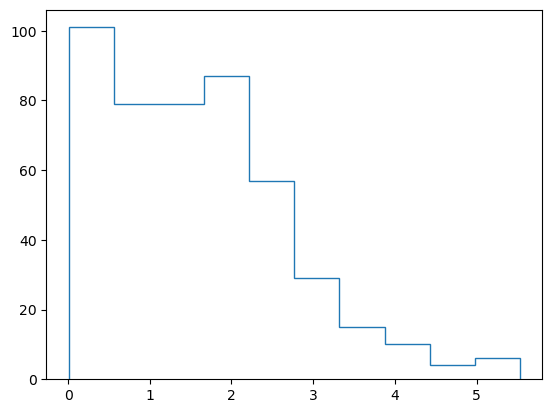

In [37]:
plt.hist(1/(f['time'][:][:,0])-1,bins=10,histtype = "step")

In [168]:
f['SubhaloLenType'][:][:, -1]

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [144]:
f['SubhaloLenType'][:][:, -1][idx1]

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [145]:
f['SubhaloBHMass'][:][idx1]/MSOL

array([[6.19119092e+07, 1.26086737e+08, 0.00000000e+00],
       [7.57870791e+06, 4.43584481e+06, 0.00000000e+00],
       [2.06788560e+08, 1.90215198e+08, 0.00000000e+00],
       [1.66818503e+06, 1.74673863e+06, 0.00000000e+00],
       [1.40154217e+08, 1.22702368e+08, 0.00000000e+00],
       [4.60558450e+06, 4.28627930e+06, 0.00000000e+00],
       [1.27157277e+08, 1.05574646e+08, 0.00000000e+00]])

In [155]:
f_no['SubhaloLenType'][:][:, -1][:,2]

array([1, 1, 1, ..., 0, 0, 0])

In [148]:
idx2 = np.where(f_no['SubhaloLenType'][:][:, -1]==0)[0]
print(len(idx2))

14532


In [170]:
len(np.where((f['SubhaloLenType'][:][:, -1,0]==1)&(f['SubhaloLenType'][:][:, -1,1]==0))[0])

0

In [167]:
len(np.where((f_no['SubhaloLenType'][:][:, -1,0]==1)&(f_no['SubhaloLenType'][:][:, -1,1]==1))[0])

468

In [156]:
f_no['SubhaloLenType'][:][:, -1][idx2][:100]

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 2],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 2, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0,

In [133]:
f = h5py.File(merger_file_1bh, 'r')

# Access the dataset 'shids_tree'
shids_tree_data = f['shids_tree'][:]

# Optionally, print out the data or its shape
print(shids_tree_data.shape)  # To see the shape of the data
print(shids_tree_data[:100])   # To print the first 10 entries


(467, 3)
[[ 99118404  99155741  99118403]
 [ 99118411  99136070  99118410]
 [ 97902989  97915567  97902988]
 [ 97469036  97472891  97469035]
 [ 97300148  97396067  97300147]
 [ 97300163  97312122  97300162]
 [ 96501649  96526395  96501648]
 [ 95881340  96220191  95881339]
 [ 95881346  96022049  95881345]
 [ 95881353  95927655  95881352]
 [ 94666038  94667860  94666037]
 [ 94158918  94236651  94158917]
 [ 94236659  94250561  94236658]
 [ 94158919  94232267  94158918]
 [ 92809253  92990814  92809252]
 [ 92990817  93005180  92990816]
 [ 92809265  92900245  92809264]
 [ 92809269  92848378  92809268]
 [ 91527327  91567269  91527326]
 [ 90497308  90779911  90497307]
 [ 90497318  90537893  90497317]
 [100568393 100698227 100568392]
 [100568403 100603019 100568402]
 [100568406 100583213 100568405]
 [100831174 100841201 100831173]
 [101207836 101211653 101207835]
 [101317100 101326066 101317099]
 [101342082 101354016 101342081]
 [ 20519036  21001264  20519035]
 [ 21001273  21033409  21001272]
 

In [26]:
shids_tree_data[1]

array([99118411, 99136070, 99118410])